<a href="https://colab.research.google.com/github/FREYDER18/SYS/blob/main/PARCIAL_SYS_2025_1_FREYDER_GIRALDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

punto 1


1.Se tiene un microprocesador de 5 bits con entrada análoga de
-3.3 a 5 [v]. Diseñe el sistema de acondicionamiento y digitalización
para la señal: \begin{equation}
x(t) = 20 \sin\left(7t - \frac{\pi}{2}\right) - 3 \cos(5t) + 2 \cos(10t)
\end{equation}Presente las simulaciones y gráficas de los procedimientos
más representativos en un cuaderno de Python,
incluyendo al menos dos períodos de la señaal estudiada.

Desarrollo Punto 1.  

- Codigo punto 1.

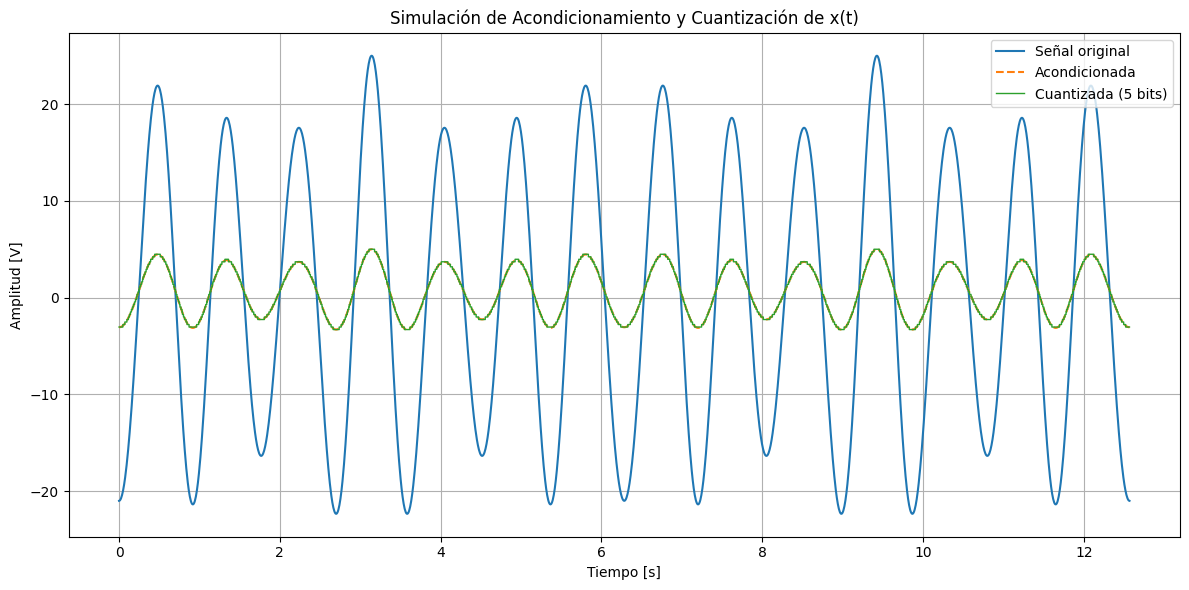

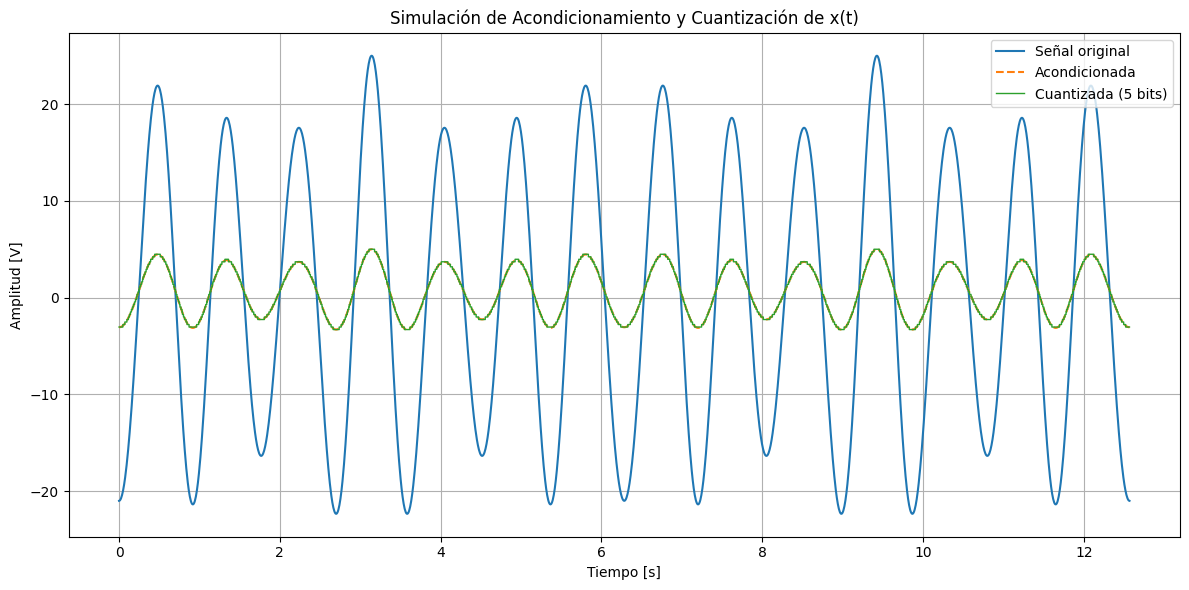

In [9]:
import numpy as np
import matplotlib.pyplot as plt

v_min = -3.3
v_max = 5

t = np.linspace(0, 4*np.pi, 2000)# tiempo de simulacion


x = 20 * np.sin(7*t - np.pi/2) - 3 * np.cos(5*t) + 2 * np.cos(10*t) #señal original

# max y min  de la señal original
x_max = np.max(x)
x_min = np.min(x)
#Calcular coeficientes de acondicionamiento
a = (5 - (-3.3)) / (x_max - x_min)
b = -3.3 - a * x_min

x_acond = a * x + b  # señal acondicionada

# Cuantización
bits = 5
niveles = 2**bits

delta = (v_max - (v_min)) / niveles  # paso de cuantización = 8.3 / 32

# Fórmula de cuantización
x_q = np.round((x_acond - v_min) / delta) * delta + v_min

#Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(t, x, label="Señal original", linewidth=1.5)
plt.plot(t, x_acond, label="Acondicionada", linestyle="--")
plt.step(t, x_q, label="Cuantizada (5 bits)", where="mid", linewidth=1)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.title("Simulación de Acondicionamiento y Cuantización de x(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


PUNTO 2

DISCRETIZACION CON ALIASING

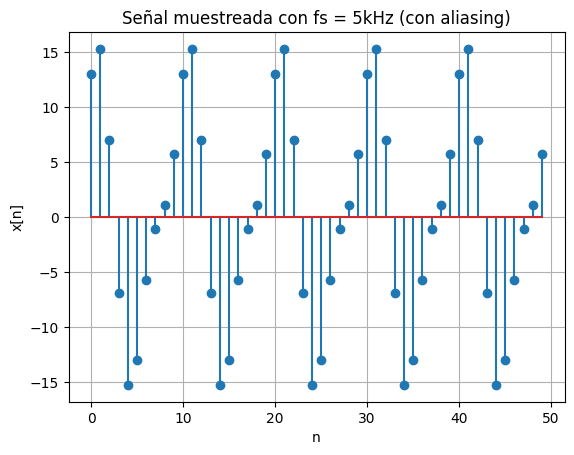

In [11]:
import numpy as np
import matplotlib.pyplot as plt

fs = 5000  # frecuencia de muestreo
Ts = 1 / fs
n = np.arange(0, 50)  # 50 muestras
t = n * Ts

# Señal original en muestras
x_n = 3 * np.cos(2 * np.pi * 500 * t) + 5 * np.sin(2 * np.pi * 1000 * t) + 10 * np.cos(2 * np.pi * 5500 * t)

plt.stem(n, x_n)
plt.title("Señal muestreada con fs = 5kHz (con aliasing)")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.grid(True)
plt.show()


In [15]:
from scipy.signal import butter, lfilter

# Señal continua
t_cont = np.linspace(0, 0.01, 10000)
x_cont = 3 * np.cos(2 * np.pi * 500 * t_cont) + 5 * np.sin(2 * np.pi * 1000 * t_cont) + 10 * np.cos(2 * np.pi * 5500 * t_cont)

# Filtro pasa bajos Butterworth
def butter_lowpass_filter(data, cutoff, fs, order=4):
    from scipy.signal import butter, lfilter
    nyq = fs / 2
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)

    return lfilter(b, a, data)

x_filt = butter_lowpass_filter(x_cont, cutoff=2500, fs=fs)

# Muestreo después de filtrar
x_sampled = x_filt[::int(len(t_cont)/len(n))]

plt.stem(n, x_sampled, use_line_collection=True)
plt.title("Señal filtrada y muestreada con fs = 5kHz (sin aliasing)")
plt.xlabel("n")
plt.ylabel("x_filtrada[n]")
plt.grid(True)
plt.show()


ValueError: Digital filter critical frequencies must be 0 < Wn < 1